In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [55]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

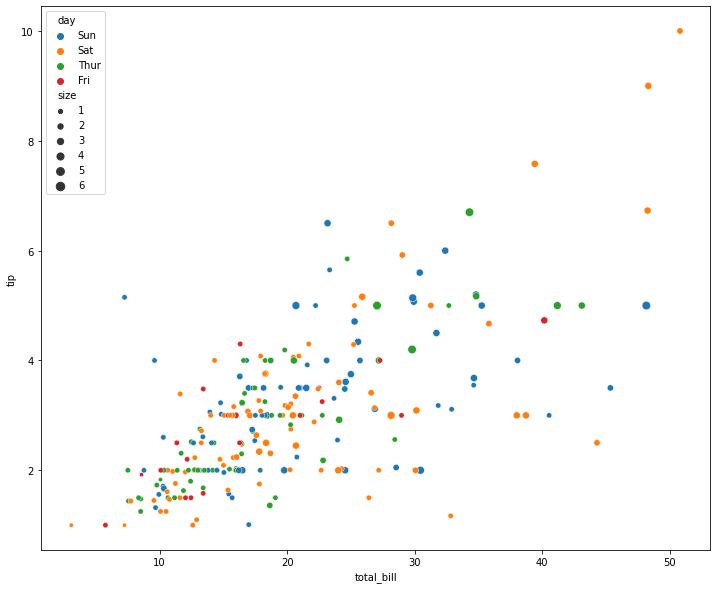

In [56]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = "total_bill", y  = "tip", size = "size", hue = "day")
plt.show()

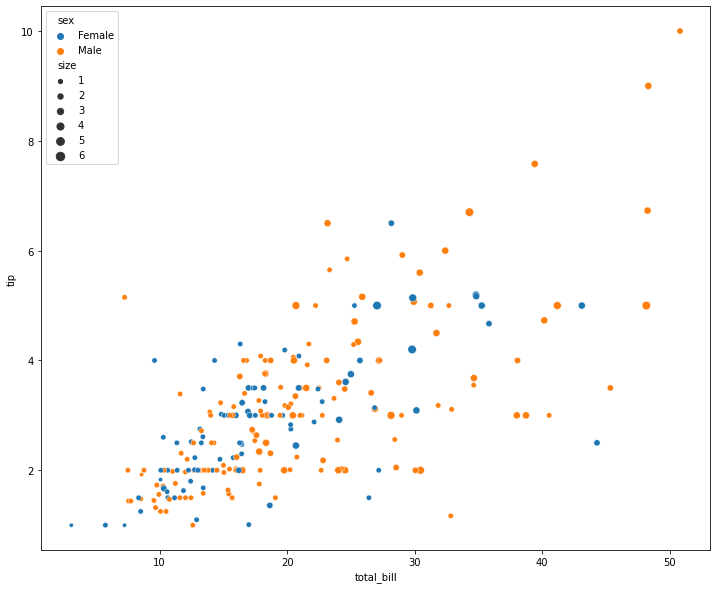

In [57]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = "total_bill", y  = "tip", size = "size", hue = "sex")
plt.show()

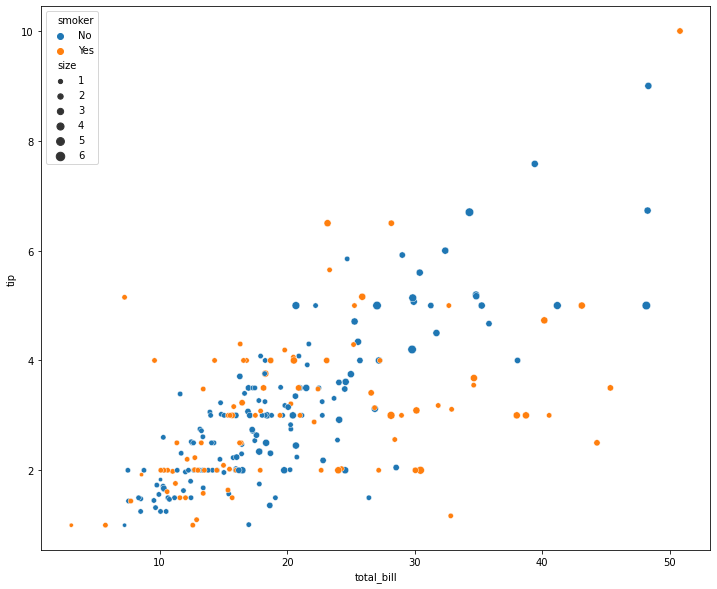

In [58]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = "total_bill", y  = "tip", size = "size", hue = "smoker")
plt.show()

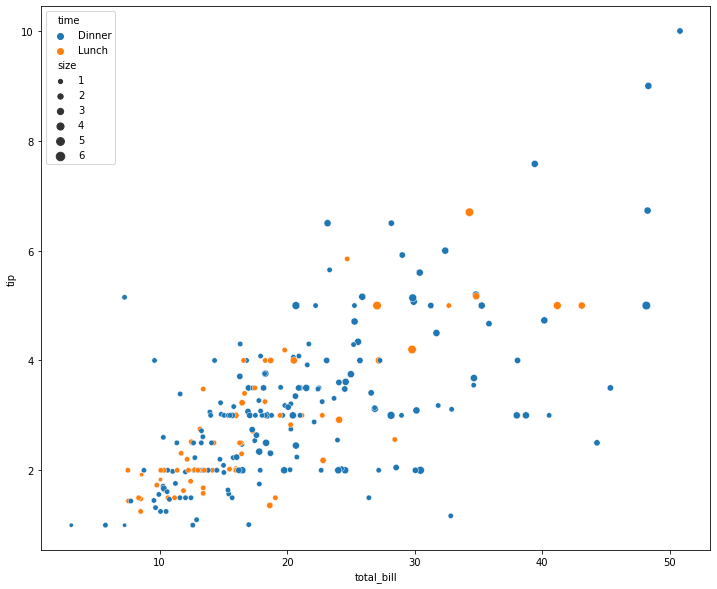

In [59]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = "total_bill", y  = "tip", size = "size", hue = "time")
plt.show()

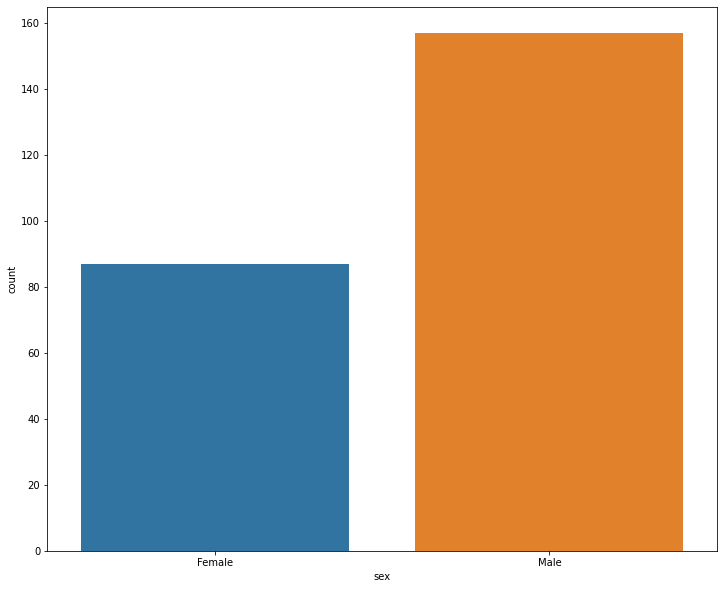

In [60]:
plt.figure(figsize=(12,10))
sns.countplot(data = df, x = "sex")
plt.show()

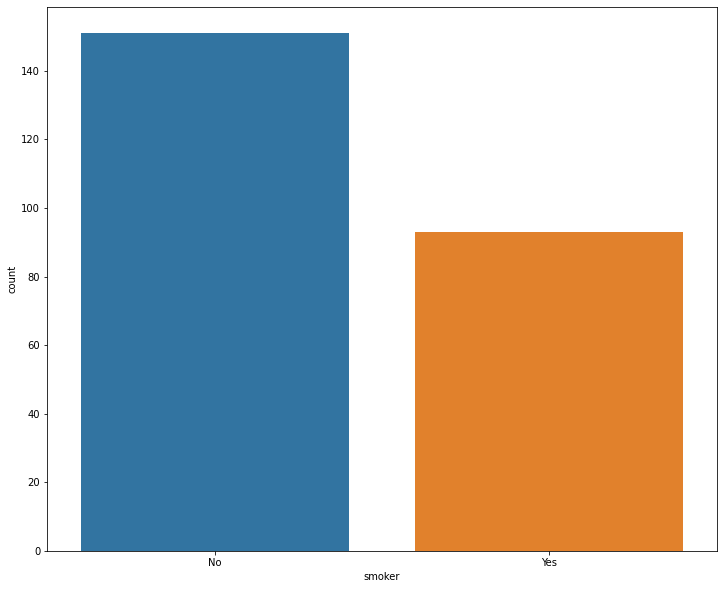

In [61]:
plt.figure(figsize=(12,10))
sns.countplot(data = df, x = "smoker")
plt.show()

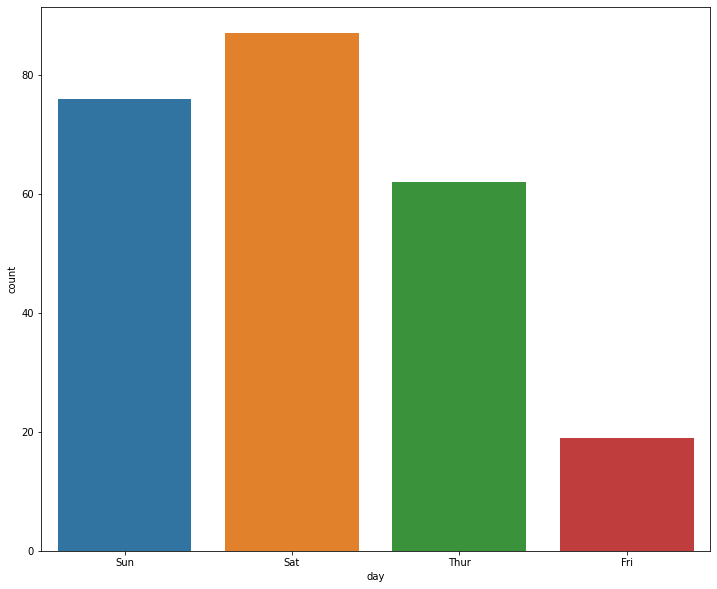

In [62]:
plt.figure(figsize=(12,10))
sns.countplot(data = df, x = "day")
plt.show()

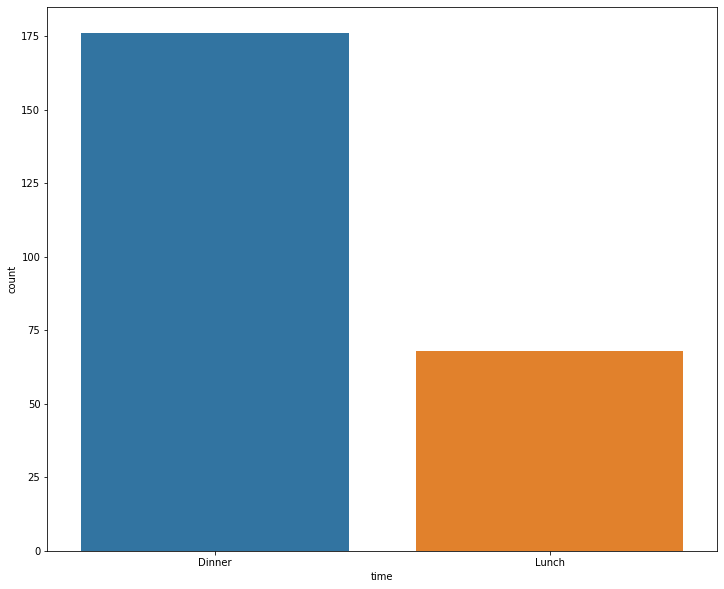

In [63]:
plt.figure(figsize=(12,10))
sns.countplot(data = df, x = "time")
plt.show()

In [64]:
encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['day'] = encoder.fit_transform(df['day'])
df['time'] = encoder.fit_transform(df['time'])

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [65]:
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
model.score(X_test, y_test)

0.34706959280474403

In [69]:
cross_val_score(model, X_test, y_test, cv=5)

array([ 0.06657069,  0.47397953,  0.5516069 ,  0.40098781, -0.06745186])

In [70]:
cross_val_score(model, X_test, y_test, cv=5).mean()

0.28513861385441336

In [73]:
test_features = np.array([[24.50, 1, 0, 0, 1, 4]])
pred = model.predict(test_features)

In [76]:
print(f"Prediction Value: {pred[0]}")

Prediction Value: 4.122096854474199
